In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
leedslending = pd.read_csv("C:\\Users\\josea\\OneDrive\\Desktop\\Feynn ML Internship\\Project 3\\Market Analysis\\LeedsLending.csv")
leedslending.set_index("Library", inplace = True)
leedslending.replace({'Closed': np.nan}, inplace = True)
leedslending = leedslending.iloc[:, :].astype(float)
leedslending.head()

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Library,,,,,,,,,,,,,,,,,,,
Allerton Bywater,13446.0,10942.0,11062.0,9569.0,8100.0,6195.0,6611.0,6219.0,7006.0,7821.0,7548.0,1827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ardsley & Tingley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13903.0,11945.0,11315.0,11479.0,13980.0
Armley,104272.0,70990.0,51107.0,67333.0,90944.0,79913.0,80537.0,80056.0,88293.0,84968.0,84688.0,79886.0,76698.0,66184.0,54533.0,50348.0,48038.0,47224.0,41105.0
Armley Heights,7394.0,5881.0,4032.0,4067.0,3065.0,3569.0,2923.0,2322.0,1294.0,1196.0,775.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beeston,88005.0,77026.0,62163.0,58043.0,48970.0,44717.0,42336.0,38186.0,55534.0,52999.0,51477.0,50092.0,46831.0,42318.0,33991.0,31146.0,27071.0,29868.0,27380.0


In [3]:
leedslending.isnull().sum()

2000-01     1
2001-02     3
2002-03     3
2003-04     3
2004-05     3
2005-06     4
2006-07     5
2007-08     5
2008-09     6
2009-10     6
2010-11     6
2011-12     6
2012-13    19
2013-14    22
2014-15    22
2015-16    23
2016-17    23
2017-18    24
2018-19    24
dtype: int64

In [4]:
leedslending.describe()

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
count,57.000000,55.000000,55.000000,55.000000,55.000000,54.000000,53.000000,53.000000,52.000000,52.000000,52.000000,52.000000,39.000000,36.000000,36.000000,35.000000,35.000000,34.000000,34.000000
mean,67294.192982,62349.436364,57541.090909,55588.509091,53093.436364,51902.592593,53953.169811,53618.018868,55301.538462,55639.519231,56072.615385,52733.692308,65324.000000,67662.833333,62428.527778,58617.857143,57255.971429,57575.382353,52824.970588
std,78927.261980,75615.586935,71875.226528,71350.028413,70478.222489,69062.131544,70725.772787,72177.067120,68330.893557,76022.639998,74263.280271,70070.579063,68428.836893,66964.354478,62050.668348,57509.049757,55466.520150,53423.551871,50401.102539
min,4551.000000,5881.000000,4032.000000,4067.000000,1254.000000,564.000000,2923.000000,2106.000000,1294.000000,1196.000000,775.000000,55.000000,3014.000000,5171.000000,6294.000000,4116.000000,24.000000,6549.000000,4789.000000
25%,15771.000000,14967.500000,13143.500000,11515.500000,9207.500000,8430.000000,9638.000000,8550.000000,9636.500000,8664.750000,9294.500000,5725.250000,17875.000000,20947.000000,18210.750000,18505.500000,19563.000000,21658.750000,20625.500000
50%,28072.000000,25877.000000,21617.000000,20454.000000,24777.000000,22940.000000,24785.000000,23360.000000,24566.000000,23732.000000,22788.500000,22092.500000,48070.000000,55208.000000,54199.500000,46142.000000,45085.000000,45032.500000,40637.000000
75%,101881.000000,89691.500000,81285.500000,78192.000000,79596.500000,74702.000000,75657.000000,72761.000000,78077.750000,77443.250000,77585.500000,79965.000000,93410.000000,92592.250000,85680.250000,81790.000000,77620.500000,79260.000000,68466.250000
max,438262.000000,406650.000000,393815.000000,398076.000000,398636.000000,388381.000000,387779.000000,389488.000000,313403.000000,384889.000000,372929.000000,352920.000000,324288.000000,316524.000000,300359.000000,281644.000000,272911.000000,266506.000000,255319.000000


In [5]:
leedslendingtotal = pd.DataFrame(leedslending.sum(axis = 0), columns = ['Books_Lent'])
leedslendingtotal.index.name = 'Year'
leedslendingtotal

,Books_Lent
Year,
2000-01,3835769.0
2001-02,3429219.0
2002-03,3164760.0
2003-04,3057368.0
2004-05,2920139.0
2005-06,2802740.0
2006-07,2859518.0
2007-08,2841755.0
2008-09,2875680.0


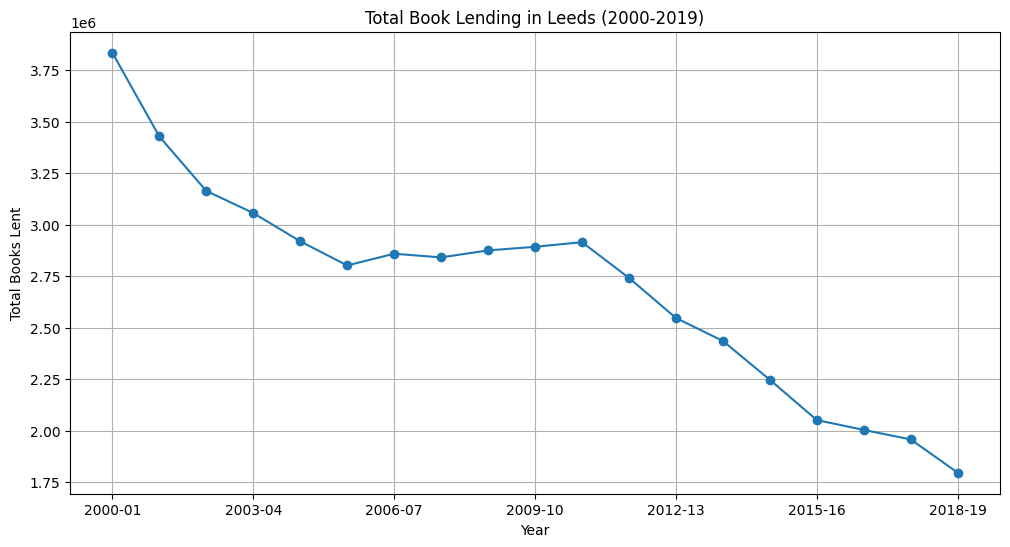

In [6]:
# Plot total book lending over the years
plt.figure(figsize=(12, 6))
plt.plot(leedslendingtotal.index, leedslendingtotal["Books_Lent"], marker='o')
plt.title("Total Book Lending in Leeds (2000-2019)")
plt.xlabel("Year")
plt.ylabel("Total Books Lent")
plt.xticks(['2000-01', '2003-04', '2006-07', '2009-10', '2012-13', '2015-16', '2018-19'])
plt.grid(True)
plt.show()

In [7]:
# Define linear function
def linear_model(x, m, c):
    return m * x - c

# Fit linear model
x_data = np.array(range(2001, 2020))
y_data = leedslendingtotal["Books_Lent"].values
popt_linear, _ = curve_fit(linear_model, x_data, y_data)

# Define exponential function
def exponential_model(x, a, b):
    return a * ((1 + b) ** (x - 2000))

# Fit exponential model
popt_exponential, _ = curve_fit(exponential_model, x_data, y_data, maxfev = 10000)

# Predict values
y_pred_linear = linear_model(x_data, *popt_linear)
y_pred_exponential = exponential_model(x_data, *popt_exponential)

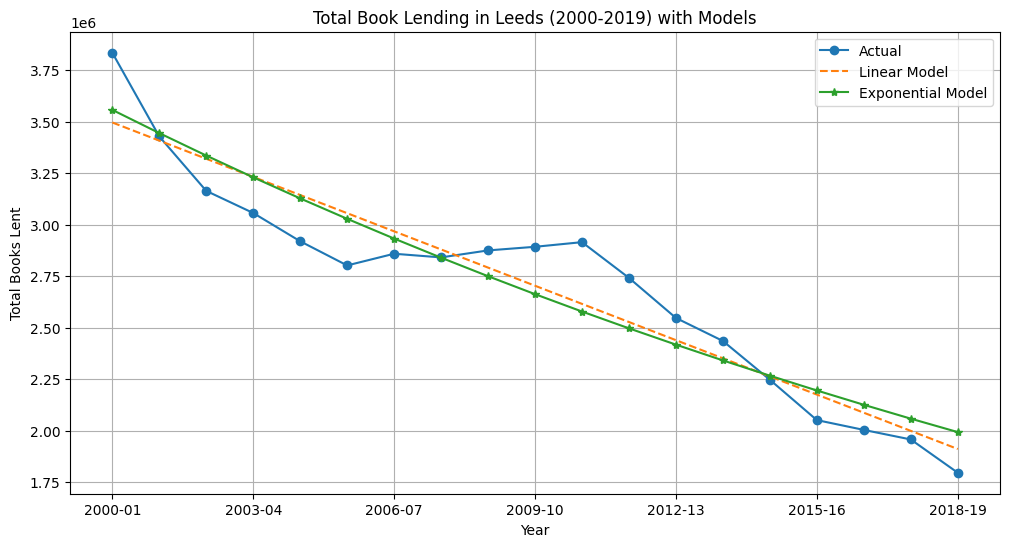

In [8]:
# Plot both models
plt.figure(figsize=(12, 6))
plt.plot(leedslendingtotal.index, y_data, marker='o', label="Actual")
plt.plot(leedslendingtotal.index, y_pred_linear, label="Linear Model", linestyle='--')
plt.plot(leedslendingtotal.index, y_pred_exponential, label="Exponential Model", marker='*')
plt.title("Total Book Lending in Leeds (2000-2019) with Models")
plt.xlabel("Year")
plt.ylabel("Total Books Lent")
plt.xticks(['2000-01', '2003-04', '2006-07', '2009-10', '2012-13', '2015-16', '2018-19'])
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Display the parameters of the models
print("Linear Model Parameters:")
print(f"Slope (m): {popt_linear[0]}")
print(f"Intercept (c): {popt_linear[1]}")

print("\nExponential Model Parameters:")
print(f"a: {popt_exponential[0]}")
print(f"b: {popt_exponential[1]}")

Linear Model Parameters:
Slope (m): -88099.36121614031
Intercept (c): -179783834.57075763

Exponential Model Parameters:
a: 3674615.6052387767
b: -0.03167775550928957


The linear model suggests a significant negative slope, indicating a decrease in book lending over time. The exponential model parameters indicate a non-growing trend, which aligns poorly with the data, as evidenced by the warning.

Given the issues with the exponential model fitting and the apparent trend in the data, it seems that a linear model is more appropriate for this dataset. The linear model equation is:

Total Books Lent = −88099.33 × Year + 179783776

This model indicates a steady decline in book lending over the years in Leeds.